## cleaned data

In [1]:
## loading in libraries for analysis
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#print(plt.style.available)
plt.style.use('seaborn-colorblind')

In [ ]:
# variants = pd.read_csv('ohio_covid_variants.csv', index_col = 0, parse_dates = ['date'], usecols = ['date','other_ratio', 'alpha_ratio'])
# #variants.melt(ignore_index = False, var_name = 'variant', value_name = 'variant_perc')
# variants_plot = variants\
#     .rename(columns = {'other_ratio':"other", 'alpha_ratio':'alpha'})\
#     .melt(ignore_index = False, var_name = 'Variant', value_name = 'Variant Percentage')
# variants_plot['Variant percentage of sampled cases'] = variants_plot['Variant Percentage'].mul(100)
# sns.lineplot(data = variants_plot,
#             x = variants_plot.index,
#             y = 'Variant percentage of sampled cases',
#             ci = None,
#             hue = 'Variant')
# plt.title('Alpha variant does not account for changing death rate over time')
# plt.show()

In [4]:
# data = pd.read_csv('deaths_teaching_mobility.csv', index_col = 0, parse_dates = ['date'])
# data.set_index('date', inplace = True)
# data.head()

,county,fips,cnty_lat,cnty_long,population,cumconfirmed,cumdeaths,newdeaths,newconfirmed,rev_newdeaths,...,major_teaching,death_prop,death_per_1000,part_work_prop_7d,part_work_sample_size,full_work_prop_7d,full_work_sample_size,full_work_std,res_visit_by_pop,bar_visit_by_pop
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,ADAMS,39001,38.845411,-83.471896,27960,0,0,0,0,0,...,Hybrid,0.0,0.0,0.092631,154,0.077861,154,0.004488,203.568392,NaN
2020-01-22,ALLEN,39003,40.772852,-84.108023,106160,0,0,0,0,0,...,Hybrid,0.0,0.0,0.100632,641,0.073459,641,0.002243,457.810983,NaN
2020-01-22,ASHLAND,39005,40.847723,-82.272808,53973,0,0,0,0,0,...,Hybrid,0.0,0.0,0.109876,308,0.081989,308,0.003439,249.115243,NaN
2020-01-22,ASHTABULA,39007,41.708603,-80.748302,98637,0,0,0,0,0,...,Hybrid,0.0,0.0,0.089040,651,0.072514,651,0.002175,120.561072,NaN
2020-01-22,ATHENS,39009,39.334256,-82.042786,67121,0,0,0,0,0,...,Hybrid,0.0,0.0,0.101534,336,0.066396,336,0.002957,441.578061,NaN


In [17]:
# data.columns

Index(['county', 'fips', 'cnty_lat', 'cnty_long', 'population', 'cumconfirmed',
       'cumdeaths', 'newdeaths', 'newconfirmed', 'rev_newdeaths',
       'rev_newconfirmed', 'rev_newconfirmed2', 'rmed_cases', 'ylower',
       'yupper', 'population_density', 'metropolitan_status',
       'nchs_urban_rural_status', 'county_enroll', 'Hybrid', 'On_Premises',
       'Online_Only', 'Other', 'Pending', 'Unknown', 'major_teaching',
       'death_prop', 'death_per_1000', 'part_work_prop_7d',
       'part_work_sample_size', 'full_work_prop_7d', 'full_work_sample_size',
       'full_work_std', 'res_visit_by_pop', 'bar_visit_by_pop',
       'major_teaching_update'],
      dtype='object')

## updated data - skip to here

In [3]:
data = pd.read_csv('deaths_teaching_mobility_posture.csv', index_col = 0, parse_dates = ['date'])
data.set_index('date', inplace = True)
data

,county,fips,cnty_lat,cnty_long,population,cumconfirmed,cumdeaths,newdeaths,newconfirmed,rev_newdeaths,...,part_work_prop_7d,part_work_sample_size,full_work_prop_7d,full_work_sample_size,full_work_std,res_visit_by_pop,bar_visit_by_pop,major_teaching_start,major_teaching_end,posture_change
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,ADAMS,39001,38.845411,-83.471896,27960,0,0,0,0,0,...,0.092631,154,0.077861,154,0.004488,203.568392,NaN,On_Premises,Hybrid,On_Premises_to_Hybrid
2020-01-22,ALLEN,39003,40.772852,-84.108023,106160,0,0,0,0,0,...,0.100632,641,0.073459,641,0.002243,457.810983,NaN,Hybrid,Hybrid,No_change
2020-01-22,ASHLAND,39005,40.847723,-82.272808,53973,0,0,0,0,0,...,0.109876,308,0.081989,308,0.003439,249.115243,NaN,Hybrid,Hybrid,No_change
2020-01-22,ASHTABULA,39007,41.708603,-80.748302,98637,0,0,0,0,0,...,0.089040,651,0.072514,651,0.002175,120.561072,NaN,Hybrid,Hybrid,No_change
2020-01-22,ATHENS,39009,39.334256,-82.042786,67121,0,0,0,0,0,...,0.101534,336,0.066396,336,0.002957,441.578061,NaN,Online_Only,Hybrid,Online_Only_to_Hybrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-15,WASHINGTON,39167,39.456906,-81.491214,61549,4413,86,0,26,0,...,0.068880,329,0.048912,329,0.002136,185.498947,NaN,Hybrid,Hybrid,No_change
2021-02-15,WAYNE,39169,40.829259,-81.888448,117082,7699,208,0,13,0,...,0.086844,581,0.070372,581,0.002220,210.051477,NaN,Hybrid,Hybrid,No_change
2021-02-15,WILLIAMS,39171,41.560520,-84.584296,37663,2963,77,0,7,0,...,0.080465,252,0.051966,252,0.002861,59.282975,NaN,Hybrid,On_Premises,Hybrid_to_On_Premises


## posture change EDA

In [7]:
data.columns

Index(['county', 'fips', 'cnty_lat', 'cnty_long', 'population', 'cumconfirmed',
       'cumdeaths', 'newdeaths', 'newconfirmed', 'rev_newdeaths',
       'rev_newconfirmed', 'rev_newconfirmed2', 'rmed_cases', 'ylower',
       'yupper', 'population_density', 'metropolitan_status',
       'nchs_urban_rural_status', 'county_enroll', 'Hybrid', 'On_Premises',
       'Online_Only', 'Other', 'Pending', 'Unknown', 'major_teaching',
       'death_prop', 'death_per_1000', 'part_work_prop_7d',
       'part_work_sample_size', 'full_work_prop_7d', 'full_work_sample_size',
       'full_work_std', 'res_visit_by_pop', 'bar_visit_by_pop',
       'major_teaching_start', 'major_teaching_end', 'posture_change'],
      dtype='object')

In [7]:
posture = data.groupby('county')[['posture_change', 'metropolitan_status', 'nchs_urban_rural_status']].min().reset_index()
posture

,county,posture_change,metropolitan_status,nchs_urban_rural_status
0,ADAMS,On_Premises_to_Hybrid,Non-metro,Noncore
1,ALLEN,No_change,Metro,Small metro
2,ASHLAND,No_change,Non-metro,Micropolitan
3,ASHTABULA,No_change,Non-metro,Micropolitan
4,ATHENS,Online_Only_to_Hybrid,Non-metro,Micropolitan
...,...,...,...,...
81,WASHINGTON,No_change,Non-metro,Micropolitan
82,WAYNE,No_change,Non-metro,Micropolitan
83,WILLIAMS,Hybrid_to_On_Premises,Non-metro,Noncore
84,WOOD,No_change,Metro,Medium metro


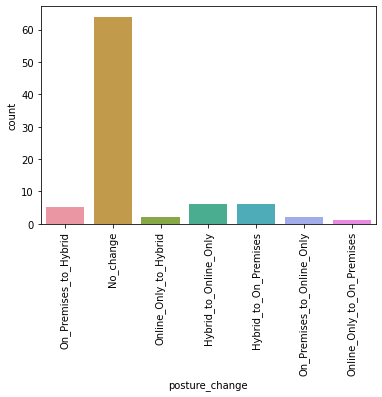

In [11]:
sns.countplot(data = posture, x = 'posture_change')
plt.xticks(rotation = 90)
plt.show()

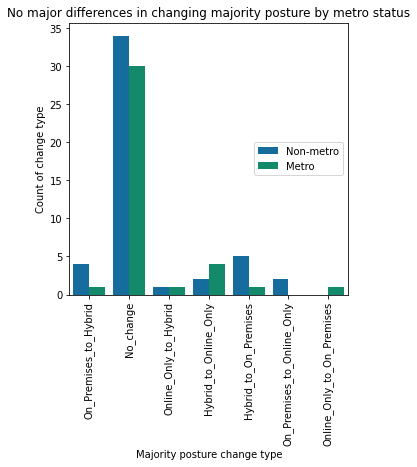

In [17]:
sns.countplot(data = posture, x = 'posture_change', hue = 'metropolitan_status')
plt.ylabel('Count of change type')
plt.xlabel('Majority posture change type')
plt.title('No major differences in changing majority posture by metro status')
plt.legend(loc = "center right")
plt.xticks(rotation = 90)
plt.show()

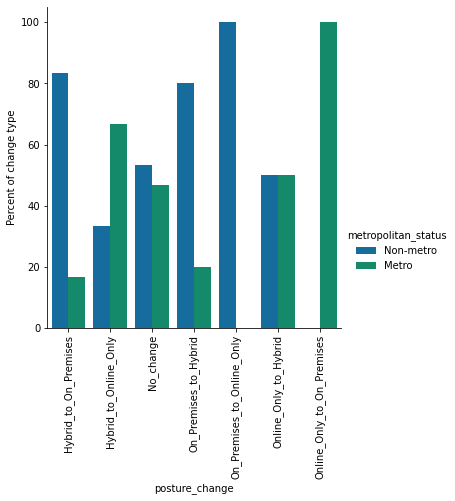

In [21]:
# if you want the percentage within group
# x,y = 'posture_change', 'metropolitan_status'
# data.groupby(x)[y].value_counts(normalize=True).mul(100).rename('Percent of change type').reset_index()\
# .pipe((sns.catplot,'data'), x=x,y='Percent of change type',hue=y,kind='bar')
# plt.xticks(rotation = 90)
# plt.show()

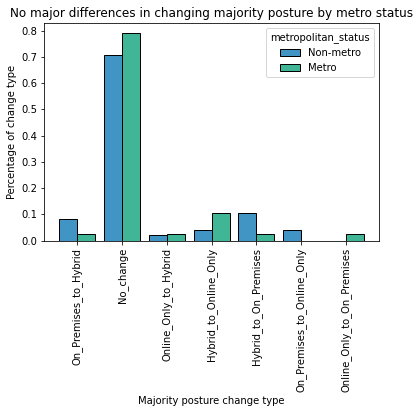

In [8]:
sns.histplot(x = posture.posture_change, hue = posture.metropolitan_status, multiple = 'dodge',
            stat = 'density', shrink = 0.8, common_norm = False)
plt.ylabel('Percentage of change type')
plt.xlabel('Majority posture change type')
plt.title('No major differences in changing majority posture by metro status')
plt.xticks(rotation = 90)
plt.show()

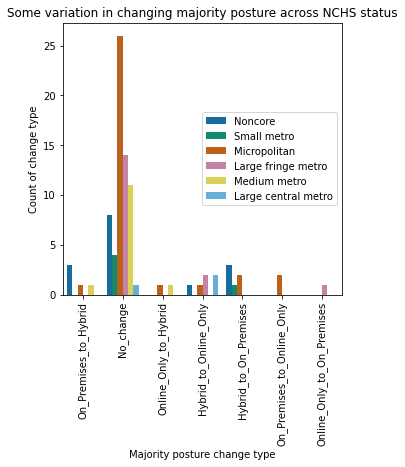

In [9]:
plt.rcParams["figure.figsize"] = (5,5)
sns.countplot(x = 'posture_change', data = posture, hue = 'nchs_urban_rural_status')
plt.legend(loc = "center right")
plt.xticks(rotation = 90)
plt.ylabel('Count of change type')
plt.xlabel('Majority posture change type')
plt.title('Some variation in changing majority posture across NCHS status')
plt.show()

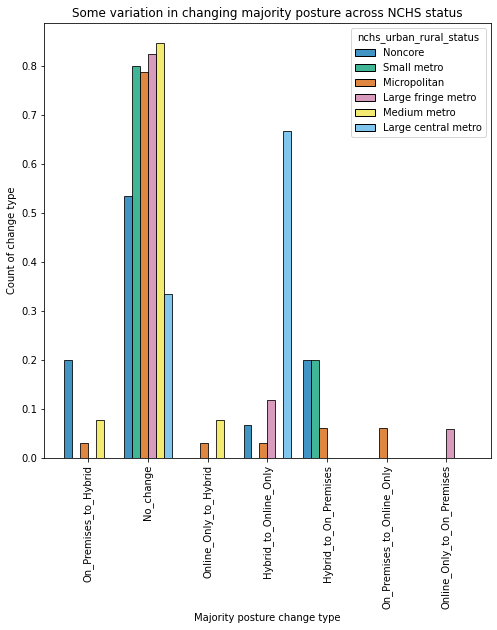

In [10]:
plt.rcParams["figure.figsize"] = (8,8)
sns.histplot(x = posture.posture_change, hue = posture.nchs_urban_rural_status, multiple = 'dodge',
            stat = 'probability', shrink = 0.8, common_norm = False)
plt.xticks(rotation = 90)
plt.ylabel('Count of change type')
plt.xlabel('Majority posture change type')
plt.title('Some variation in changing majority posture across NCHS status')
plt.show()

In [101]:
cross_tab_tmp = data.groupby('county')[['nchs_urban_rural_status', 'major_teaching_start']].min()
pd.crosstab(index=cross_tab_tmp['nchs_urban_rural_status'],
           columns = cross_tab_tmp['major_teaching_start'],
           margins = True)

major_teaching_start,Hybrid,On_Premises,Online_Only,All
nchs_urban_rural_status,,,,
Large central metro,2,0,1,3
Large fringe metro,16,0,1,17
Medium metro,9,2,2,13
Micropolitan,24,8,1,33
Noncore,9,6,0,15
Small metro,5,0,0,5
All,65,16,5,86


In [102]:
cross_tab_tmp = data.groupby('county')[['nchs_urban_rural_status', 'major_teaching_end']].min()
pd.crosstab(index=cross_tab_tmp['nchs_urban_rural_status'],
           columns = cross_tab_tmp['major_teaching_end'],
           margins = True)

major_teaching_end,Hybrid,On_Premises,Online_Only,All
nchs_urban_rural_status,,,,
Large central metro,0,0,3,3
Large fringe metro,14,1,2,17
Medium metro,11,1,1,13
Micropolitan,23,7,3,33
Noncore,8,6,1,15
Small metro,4,1,0,5
All,60,16,10,86


## more general EDA

In [11]:
county_mask = data.groupby("county")['population'].max().sort_values(ascending=False).index.tolist()

In [12]:
data.rename(columns = {'rev_newconfirmed2':'New Cases', 'rev_newdeaths':'New Deaths'}, inplace = True)

In [ ]:
# initial exporation with newly processed data
# tmp = data.groupby(data.index)['rev_newconfirmed2','newconfirmed']\
# .sum().rename(columns={'rev_newconfirmed2':'Corrected', 'newconfirmed':'Original'})\
# .melt(ignore_index = False, var_name = 'Case Type', value_name = 'New Cases')
# tmp.head()
# plt.figure(figsize = (15,8))
# sns.relplot(data = tmp, x = tmp.index, y = 'New Cases', hue = 'Case Type', kind = 'line', palette=['r', 'g'], alpha = 0.5)
# plt.title('Correction smooths out the raw number of daily new cases')
# plt.show()

In [ ]:
# by teaching status
# tmp2 = data.groupby(['major_teaching', data.index])['rev_newconfirmed2','newconfirmed']\
# .sum().reset_index(0)\
# .melt(ignore_index = False, id_vars = 'major_teaching', var_name = 'Case Type', value_name = 'New Cases')

## by county
# tmp2 = data[data.county.isin(county_mask[:3])].groupby(['county', data[data.county.isin(county_mask[:3])].index])['rev_newconfirmed2','newconfirmed','ylower','yupper']\
# .sum().reset_index(0).rename(columns={'rev_newconfirmed2':'Corrected',
#                                       'newconfirmed':'Original',
#                                      'ylower':'Lower bound',
#                                      'yupper':'Upper bound'})\
# .melt(ignore_index = False, id_vars = 'county',
#       var_name = 'Case Type', value_name = 'New Cases')
# tmp2.head()

# plt.figure(figsize = (15,8))
# sns.relplot(data = tmp2,
#             x = tmp2.index,
#             y = 'New Cases',
#             hue = 'Case Type', 
#             kind = 'line', alpha = 0.5,
#             col = 'county')
# plt.suptitle('test', y = 1.05, size = 20)
# plt.show()

In [ ]:
# scaling the data - creating variables
# data['newconfirmed_per_1000'] = data.newconfirmed.div(1000)
# data['newdeaths_per_1000'] = data.newdeaths.div(1000)
# data['cumconfirmed_per_1000'] = data.cumconfirmed.div(1000)
# data['cumdeaths_per_1000'] = data.cumdeaths.div(1000)
# data.head()

## multiscale single plot

In [22]:
data.columns

Index(['county', 'fips', 'cnty_lat', 'cnty_long', 'population', 'cumconfirmed',
       'cumdeaths', 'newdeaths', 'newconfirmed', 'New Deaths',
       'rev_newconfirmed', 'New Cases', 'rmed_cases', 'ylower', 'yupper',
       'population_density', 'metropolitan_status', 'nchs_urban_rural_status',
       'county_enroll', 'Hybrid', 'On_Premises', 'Online_Only', 'Other',
       'Pending', 'Unknown', 'major_teaching', 'death_prop', 'death_per_1000',
       'part_work_prop_7d', 'part_work_sample_size', 'full_work_prop_7d',
       'full_work_sample_size', 'full_work_std', 'res_visit_by_pop',
       'bar_visit_by_pop', 'major_teaching_start', 'major_teaching_end',
       'posture_change'],
      dtype='object')

In [65]:
data.groupby([data.index, 'county', 'posture_change'])[['New Deaths', 'New Cases']].sum().reset_index(level = [1,2])

,county,posture_change,New Deaths,New Cases
date,,,,
2020-01-22,ADAMS,On_Premises_to_Hybrid,0,0.0
2020-01-22,ALLEN,No_change,0,0.0
2020-01-22,ASHLAND,No_change,0,0.0
2020-01-22,ASHTABULA,No_change,0,0.0
2020-01-22,ATHENS,Online_Only_to_Hybrid,0,0.0
...,...,...,...,...
2021-02-15,WASHINGTON,No_change,0,26.0
2021-02-15,WAYNE,No_change,0,13.0
2021-02-15,WILLIAMS,Hybrid_to_On_Premises,0,7.0


In [68]:
data[['county','population', 'population_density']]

,county,population,population_density
date,,,
2020-01-22,ADAMS,27960,47.44
2020-01-22,ALLEN,106160,254.29
2020-01-22,ASHLAND,53973,126.45
2020-01-22,ASHTABULA,98637,138.51
2020-01-22,ATHENS,67121,129.71
...,...,...,...
2021-02-15,WASHINGTON,61549,94.80
2021-02-15,WAYNE,117082,208.56
2021-02-15,WILLIAMS,37663,87.22


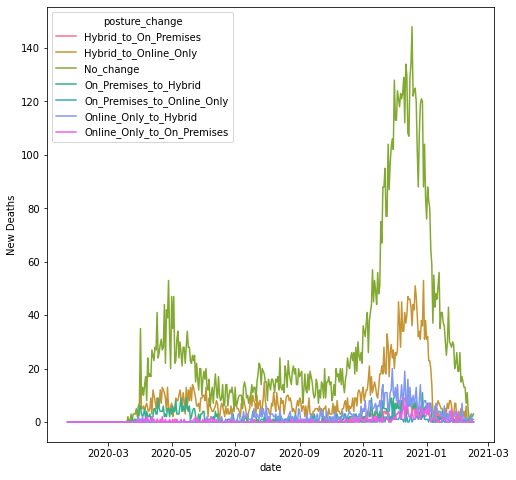

In [60]:
sns.lineplot(x = data.groupby([data.index, 'posture_change'])[['New Deaths', 'New Cases']].sum().reset_index(1).index,
            y = data.groupby([data.index, 'posture_change'])[['New Deaths', 'New Cases']].sum().reset_index(1)['New Deaths'],
            hue = data.groupby([data.index, 'posture_change'])[['New Deaths', 'New Cases']].sum().reset_index(1)['posture_change'],
            ci = None)
plt.show()

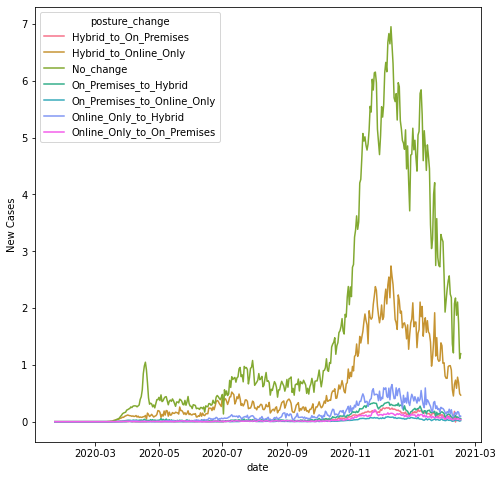

In [59]:
sns.lineplot(x = data.groupby([data.index, 'posture_change'])[['New Deaths', 'New Cases']].sum().reset_index(1).index,
            y = data.groupby([data.index, 'posture_change'])[['New Deaths', 'New Cases']].sum().reset_index(1)['New Cases'].div(1000),
            hue = data.groupby([data.index, 'posture_change'])[['New Deaths', 'New Cases']].sum().reset_index(1)['posture_change'],
            ci = None)
plt.show()

In [ ]:
# # matplotlib question
# def diff_scale_plot_over_time(a='New Cases', b = 'New Deaths'):
#     tmp = data.groupby(data.index)[a,b].sum()
#     t = tmp.index
#     data1 = tmp[a]
#     data2 = tmp[b]

#     fig, ax1 = plt.subplots()

#     color = 'tab:red'
#     ax1.set_xlabel('Time')
#     ax1.set_ylabel(a, color=color)
#     ax1.plot(t, data1, color=color)
#     ax1.tick_params(axis='y', labelcolor=color)

#     ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

#     color = 'tab:blue'
#     ax2.set_ylabel(b, color=color)  # we already handled the x-label with ax1
#     ax2.plot(t, data2, color=color)
#     ax2.tick_params(axis='y', labelcolor=color)
#     plt.title(a + ' and ' + b + ' over time')
#     fig.tight_layout()  # otherwise the right y-label is slightly clipped
#     plt.show()

# diff_scale_plot_over_time()

In [ ]:
# seaborn version
def multi_diff_scale_plot_over_time(a='New Cases', b = 'New Deaths', title = 'test'):
    tmp = data.groupby(data.index)[a,b].sum()
    ax = sns.lineplot(data = tmp, x= tmp.index, y = a, color = 'red', ci = None, label = a)
    lines, labels = ax.get_legend_handles_labels()
    ax2 = ax.twinx()
    sns.lineplot(data = tmp, x= tmp.index, y = b, color = 'blue', ci = None, label = b)
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')
    plt.title(title)
    plt.show()

In [ ]:
multi_diff_scale_plot_over_time(title = 'After smoothing, new cases and deaths trend more closely together over time')

## multiscale multiple plots

In [53]:
for i in range(3):
    for j in range(3):
        k = j + i * (3)
        print(k)

0
1
2
3
4
5
6
7
8


In [34]:
data['posture_change'].unique().tolist()

['On_Premises_to_Hybrid',
 'No_change',
 'Online_Only_to_Hybrid',
 'Hybrid_to_Online_Only',
 'Hybrid_to_On_Premises',
 'On_Premises_to_Online_Only',
 'Online_Only_to_On_Premises']

In [54]:
# Plots deaths/cases on a single plot cleanly
# pay attention to parameters
def manual_facet_twinx_plot(a='New Cases', b = 'New Deaths', col_sub = 'major_teaching', row = 1, col = 3, width = 12, height = 5, main = 'test'):
    # adjust for when row > 1 (nested for loop to adjust size of axes i.e. axes[0,1])
    fig, axes = plt.subplots(row, col, figsize = (width,height))
    tmp_list = data[col_sub].unique().tolist()
    if row == 1:
        for i in range(len(tmp_list)):
            tmp = data[data[col_sub] == tmp_list[i]].groupby(data[data[col_sub] == tmp_list[i]].index)[a,b].sum()
            data1 = tmp[a]
            data2 = tmp[b]
            t = tmp.index
            color = 'tab:red'
            axes[i].set_xlabel('Time')
            axes[i].set_ylabel(a, color = color)
            axes[i].plot(t, data1, color = color)
            axes[i].tick_params(axis = 'y', labelcolor = color)
            axes[i].tick_params(axis = 'x', rotation = 30)

            ax1 = axes[i].twinx()

            color = 'tab:blue'
            ax1.set_ylabel(b, color = color)
            ax1.plot(t, data2, color = color)
            ax1.tick_params(axis = 'y', labelcolor = color)
            plt.title(col_sub.title() + ': ' + tmp_list[i])
    else:
        for i in range(col):
            for j in range(row):
                k = j + i * (row) # traversing across a 1-d list
                if k < len(tmp_list):
                    tmp = data[data[col_sub] == tmp_list[k]].groupby(data[data[col_sub] == tmp_list[k]].index)[a,b].sum()
                    data1 = tmp[a]
                    data2 = tmp[b]
                    t = tmp.index
                    color = 'tab:red'
                    axes[j,i].set_xlabel('Time')
                    axes[j,i].set_ylabel(a, color = color)
                    axes[j,i].plot(t, data1, color = color)
                    axes[j,i].tick_params(axis = 'y', labelcolor = color)
                    axes[j,i].tick_params(axis = 'x', rotation = 30)

                    ax1 = axes[j,i].twinx()

                    color = 'tab:blue'
                    ax1.set_ylabel(b, color = color)
                    ax1.plot(t, data2, color = color)
                    ax1.tick_params(axis = 'y', labelcolor = color)
                    plt.title(col_sub.title() + ': ' + tmp_list[k])
    
    plt.suptitle(main, y = 0.98, size = 20)
    fig.tight_layout()    
    plt.show()

<ipython-input-54-4f68b54279e8>:32: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tmp = data[data[col_sub] == tmp_list[k]].groupby(data[data[col_sub] == tmp_list[k]].index)[a,b].sum()
<ipython-input-54-4f68b54279e8>:32: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tmp = data[data[col_sub] == tmp_list[k]].groupby(data[data[col_sub] == tmp_list[k]].index)[a,b].sum()
<ipython-input-54-4f68b54279e8>:32: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tmp = data[data[col_sub] == tmp_list[k]].groupby(data[data[col_sub] == tmp_list[k]].index)[a,b].sum()
<ipython-input-54-4f68b54279e8>:32: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tmp = data[data[col_sub] == tmp_list[k]].g

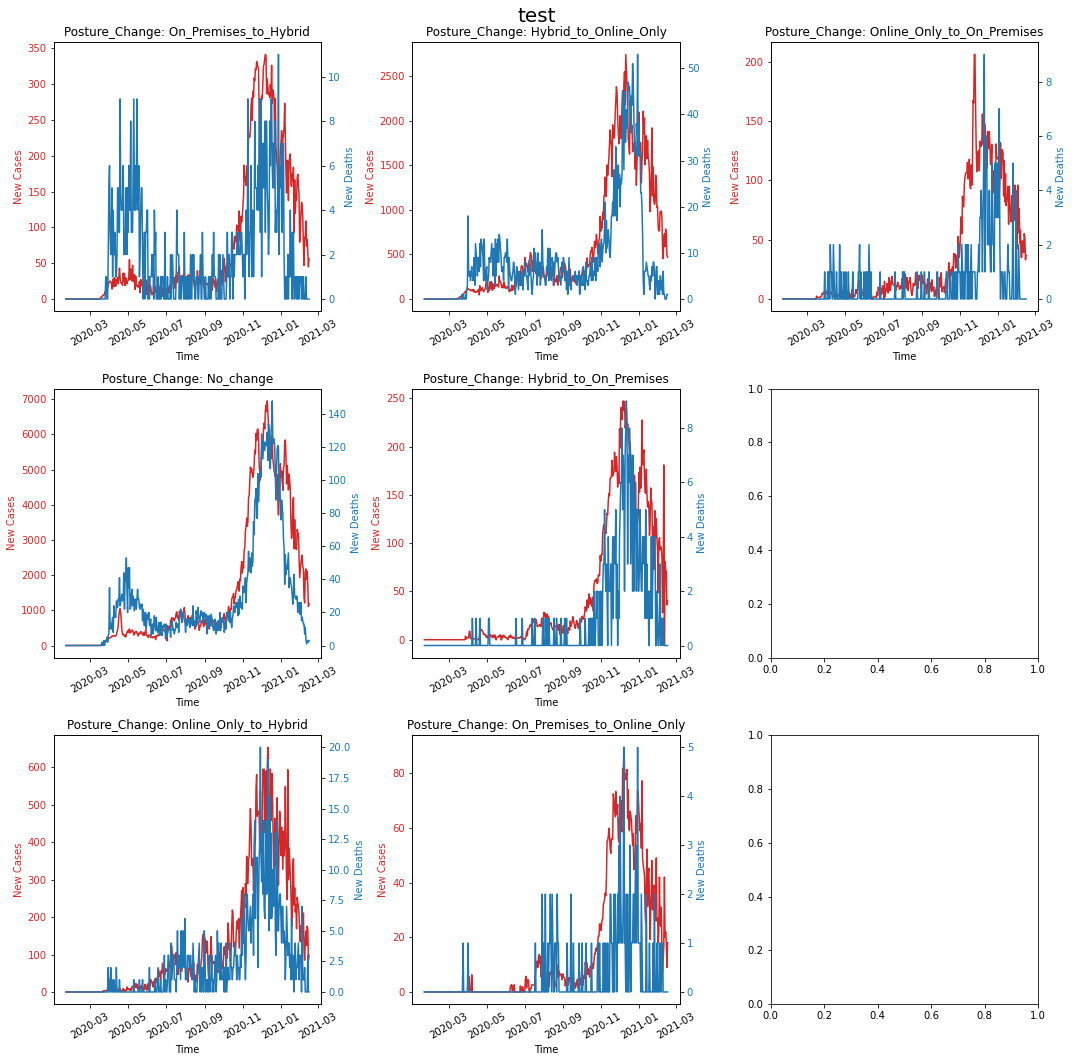

In [55]:
manual_facet_twinx_plot(col_sub = 'posture_change', row = 3, width = 15, height = 15)

<ipython-input-20-84d4e04b208b>:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tmp = data[data[col_sub] == tmp_list[i]].groupby(data[data[col_sub] == tmp_list[i]].index)[a,b].sum()
<ipython-input-20-84d4e04b208b>:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tmp = data[data[col_sub] == tmp_list[i]].groupby(data[data[col_sub] == tmp_list[i]].index)[a,b].sum()
<ipython-input-20-84d4e04b208b>:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tmp = data[data[col_sub] == tmp_list[i]].groupby(data[data[col_sub] == tmp_list[i]].index)[a,b].sum()


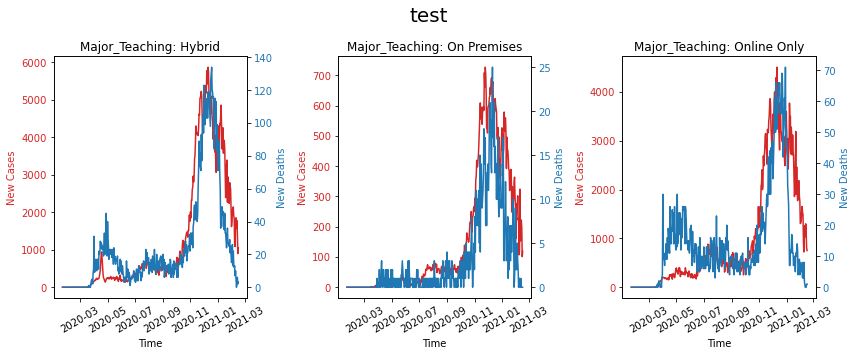

In [21]:
manual_facet_twinx_plot()

## multiscale plots by counties

In [56]:
# mind the parameters, but will plot deaths/cases on a single plot cleanly
def county_manual_facet_twinx_plot(a='New Cases', b = 'New Deaths', num_county = 9, row = 3, col = 3, width = 12, height = 5, main = 'test'):
    fig, axes = plt.subplots(row, col, figsize = (width,height))
    tmp_list = county_mask[:num_county]
    for i in range(col):
        for j in range(row):
            k = j + i * row # traversing across a 1-d list
            tmp = data.loc[data.county == tmp_list[k], [a,b]]
            
            data1 = tmp[a]
            data2 = tmp[b]
            t = tmp.index
            color = 'tab:red'
            axes[j,i].set_xlabel('Time')
            axes[j,i].set_ylabel(a, color = color)
            axes[j,i].plot(t, data1, color = color)
            axes[j,i].tick_params(axis = 'y', labelcolor = color)
            axes[j,i].tick_params(axis = 'x', rotation = 30)

            ax1 = axes[j,i].twinx()

            color = 'tab:blue'
            ax1.set_ylabel(b, color = color)
            ax1.plot(t, data2, color = color)
            ax1.tick_params(axis = 'y', labelcolor = color)
            plt.title(tmp_list[k].title() + ': (' + str(k+1) + ' largest county)')

    plt.suptitle(main, y = 0.98, size = 20)
    fig.tight_layout()    
    plt.show()

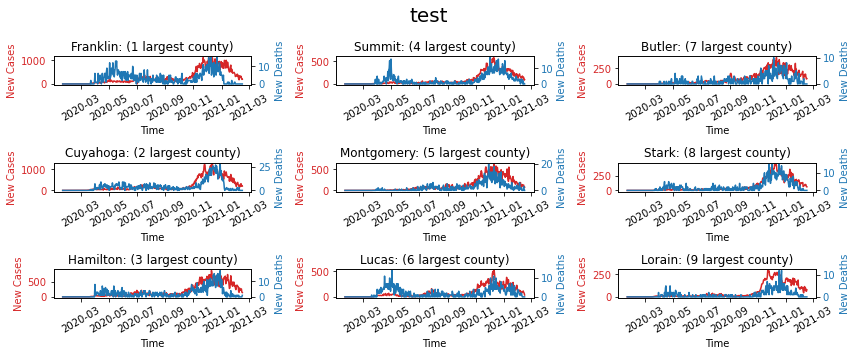

In [57]:
county_manual_facet_twinx_plot()

## individual time series plots

In [ ]:
# time series plotting function
def time_series_plotter(var = 'newconfirmed'):
    sns.relplot(data = data.groupby(data.index)[var].sum(),
           x = data.groupby(data.index)[var].sum().index,
           y = data.groupby(data.index)[var].sum(),
           kind = 'line',
           ci = None)
    plt.title(var + ' over time')
    plt.show()

## multiple plot different scales

In [ ]:
## multi-variable plot function
def time_series_multi_plotter(var1 = 'newconfirmed_per_1000', var2 = 'newdeaths_per_1000'):
    tmp = data.melt(value_vars = [var1, var2], ignore_index = False)
    sns.relplot(data = tmp,
               x = tmp.index,
               y = 'value',
               kind = 'line',
               ci = None,
               hue = 'variable')
    plt.show()

In [ ]:
# x=[10, 12, 15, 16,18, 20]
# for i in range(3):
#     for j in range(2):
#         k = j + i*(3-1)
#         print(k)
#         print(x[k])

## different scale attempts in seaborn

manual version works better for plots

In [ ]:
# seaborn version
def multi_diff_scale_plot_over_time(a='newconfirmed_per_1000', b = 'newdeaths_per_1000'):
    tmp = data.groupby(data.index)[a,b].sum()
    ax = sns.lineplot(data = tmp, x= tmp.index, y = a, color = 'red', ci = None, label = a)
    lines, labels = ax.get_legend_handles_labels()
    ax2 = ax.twinx()
    sns.lineplot(data = tmp, x= tmp.index, y = b, color = 'blue', ci = None, label = b)
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')
    plt.title(a + ' and ' + b + ' over time')
    plt.show()

In [ ]:
def diff_scale_plot(a='newconfirmed_per_1000', b = 'newdeaths_per_1000'):
    tmp = data.groupby(data.index)[a,b].sum()
    ax = sns.lineplot(data = tmp, x= tmp.index, y = a, color = 'red', ci = None, label = a)
    lines, labels = ax.get_legend_handles_labels()
    ax2 = ax.twinx()
    sns.lineplot(data = tmp, x= tmp.index, y = b, color = 'blue', ci = None, label = b)
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')
    plt.title(a + ' and ' + b + ' over time')

In [ ]:
def twin_lineplot(x,y,**kwargs):
    ax = plt.twinx()
    sns.lineplot(x=x,y=y,**kwargs, ax=ax)
def multi_grid_diff_scale_plot_over_time(a = 'newconfirmed_per_1000', b = 'newdeaths_per_1000', cat = 'metropolitan_status', wrap = 3, font = 10, title=0.8):
    tmp = data.groupby([cat, data.index])[a,b].sum().reset_index()
    g = sns.FacetGrid(tmp, col = cat, col_wrap = wrap, legend_out = True)
    g.map(sns.lineplot, 'date', a, color = 'red').add_legend()
    g.map(twin_lineplot, 'date', b, color = 'green').add_legend()
    g.fig.autofmt_xdate()
    g.fig.subplots_adjust(top=title)
    g.fig.suptitle(a + ' and ' + b + ' by ' + cat + ' categories', fontsize = font)
    plt.show()

In [ ]:
# manual method
# fig, axes = plt.subplots(1,3, figsize = (12, 6))
# a = 'newconfirmed_per_1000'
# b = 'newdeaths_per_1000'
# col_sub = 'major_teaching'
# sub_cat = 'Hybrid'
# tmp = data[data[col_sub] == sub_cat].groupby(data[data[col_sub] == sub_cat].index)[a,b].sum()
# t = tmp.index
# data1 = tmp[a]
# data2 = tmp[b]
# color = 'tab:red'
# axes[0].set_xlabel('Time')
# axes[0].set_ylabel(a, color = color)
# axes[0].plot(t, data1, color = color)
# axes[0].tick_params(axis = 'y', labelcolor = color)
# axes[0].tick_params(axis = 'x', labelrotation = 45)

# ax1 = axes[0].twinx()

# color = 'tab:blue'
# ax1.set_ylabel(b, color = color)
# ax1.plot(t, data2, color = color)
# ax1.tick_params(axis = 'y', labelcolor = color)
# ax1.tick_params(axis='x', labelrotation=45)
# plt.title(col_sub.title() + ': ' + sub_cat)


# sub_cat = 'Online Only'
# tmp = data[data[col_sub] == sub_cat].groupby(data[data[col_sub] == sub_cat].index)[a,b].sum()
# t = tmp.index
# data1 = tmp[a]
# data2 = tmp[b]
# color = 'tab:red'
# axes[1].set_xlabel('Time')
# axes[1].set_ylabel(a, color = color)
# axes[1].plot(t, data1, color = color)
# axes[1].tick_params(axis = 'y', labelcolor = color)
# axes[1].tick_params(axis = 'x', labelrotation = 45)

# ax1 = axes[1].twinx()

# color = 'tab:blue'
# ax1.set_ylabel(b, color = color)
# ax1.plot(t, data2, color = color)
# ax1.tick_params(axis = 'y', labelcolor = color)

# plt.title(col_sub.title() + ': ' + sub_cat)

# fig.tight_layout()

# sub_cat = 'On Premises'
# tmp = data[data[col_sub] == sub_cat].groupby(data[data[col_sub] == sub_cat].index)[a,b].sum()
# t = tmp.index
# data1 = tmp[a]
# data2 = tmp[b]
# color = 'tab:red'
# axes[2].set_xlabel('Time')
# axes[2].set_ylabel(a, color = color)
# axes[2].plot(t, data1, color = color)
# axes[2].tick_params(axis = 'y', labelcolor = color)
# axes[2].tick_params(axis = 'x', labelrotation = 45)

# ax1 = axes[2].twinx()

# color = 'tab:blue'
# ax1.set_ylabel(b, color = color)
# ax1.plot(t, data2, color = color)
# ax1.tick_params(axis = 'y', labelcolor = color)
# plt.title(col_sub.title() + ': ' + sub_cat)

# fig.tight_layout()


## county grid plot for single variable

In [ ]:
def county_time_series_grid_plotter(var = 'newconfirmed', num_county = 9, wrap = 3):
    g = sns.relplot(data = data[data.county.isin(county_mask[:num_county])].sort_values(by = 'population', ascending = False),
       x = data[data.county.isin(county_mask[:num_county])].sort_values(by = 'population', ascending = False).index,
       y = var,
        kind = 'line',
       col = 'county',
       col_wrap = wrap)
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(var + ' of the ' + str(num_county) + ' largest counties', fontsize = 20)
    plt.show()

In [ ]:
plt.figure(figsize = (8,8))
multi_grid_diff_scale_plot_over_time(font = 15, wrap = 2)

## plotting by individual counties

In [ ]:
def county_time_series_grid_plotter(var = 'newconfirmed', num_county = 9, wrap = 3):
    g = sns.relplot(data = data[data.county.isin(county_mask[:num_county])].sort_values(by = 'population', ascending = False),
       x = data[data.county.isin(county_mask[:num_county])].sort_values(by = 'population', ascending = False).index,
       y = var,
        kind = 'line',
       col = 'county',
       col_wrap = wrap)
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(var + ' of the ' + str(num_county) + ' largest counties', fontsize = 20)
    plt.show()

## multi line on single plot

In [ ]:
def county_time_series_single_plotter(var = 'newdeaths', num_county = 9):
    sns.relplot(data = data[data.county.isin(county_mask[:num_county])].sort_values(by = 'population', ascending = False),
       x = data[data.county.isin(county_mask[:num_county])].sort_values(by = 'population', ascending = False).index,
       y = var,
        kind = 'line',
       hue = 'county')
    plt.title(var + ' for the ' + str(num_county) + ' largest counties')
    plt.show()

In [ ]:
county_time_series_single_plotter('newconfirmed')

In [ ]:
county_time_series_single_plotter('newdeaths')

In [ ]:
county_time_series_single_plotter('cumconfirmed')

In [ ]:
county_time_series_single_plotter('cumdeaths')

## plotting with other categorical data

In [ ]:
def category_time_series_single_plotter(var = 'newdeaths', cat = 'metropolitan_status'):
    sns.relplot(data = data.groupby([cat,data.index])[var].sum().unstack(0).melt(ignore_index = False, value_name = var),
       x = data.groupby([cat,data.index])[var].sum().unstack(0).melt(ignore_index = False, value_name = var).index,
       y = var,
        kind = 'line',
       hue = cat,
           ci = None)
    plt.title(var + ' by ' + str(cat))
    plt.show()

## grid plots for categories

In [ ]:
def category_time_series_grid_plotter(var = 'newdeaths', cat = 'metropolitan_status', wrap = 3):
    sns.relplot(data = data.groupby([cat,data.index])[var].sum().unstack(0).melt(ignore_index = False, value_name = var),
       x = data.groupby([cat,data.index])[var].sum().unstack(0).melt(ignore_index = False, value_name = var).index,
       y = var,
        kind = 'line',
       col = cat,
                col_wrap = wrap,
           ci = None)
    plt.show()

## rolling average

In [70]:
data.columns

Index(['county', 'fips', 'cnty_lat', 'cnty_long', 'population', 'cumconfirmed',
       'cumdeaths', 'newdeaths', 'newconfirmed', 'New Deaths',
       'rev_newconfirmed', 'New Cases', 'rmed_cases', 'ylower', 'yupper',
       'population_density', 'metropolitan_status', 'nchs_urban_rural_status',
       'county_enroll', 'Hybrid', 'On_Premises', 'Online_Only', 'Other',
       'Pending', 'Unknown', 'major_teaching', 'death_prop', 'death_per_1000',
       'part_work_prop_7d', 'part_work_sample_size', 'full_work_prop_7d',
       'full_work_sample_size', 'full_work_std', 'res_visit_by_pop',
       'bar_visit_by_pop', 'major_teaching_start', 'major_teaching_end',
       'posture_change'],
      dtype='object')

In [71]:
data['dr1'] = data['New Deaths'].div(data['New Cases'])
data['dr1'].head()

date
2020-01-22   NaN
2020-01-22   NaN
2020-01-22   NaN
2020-01-22   NaN
2020-01-22   NaN
Name: dr1, dtype: float64

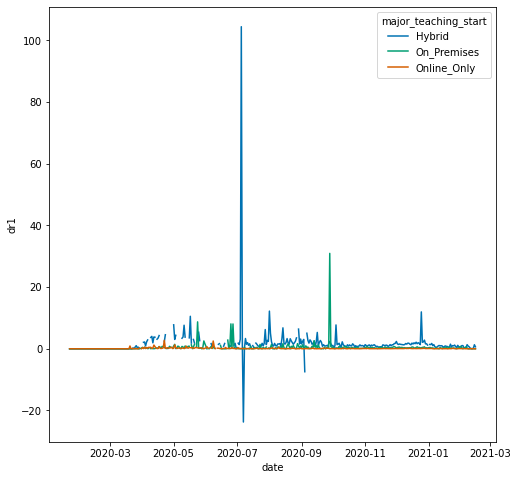

In [75]:
sns.lineplot(data = data.groupby(['major_teaching_start', data.index])['dr1'].sum().reset_index(0),
             x = data.groupby(['major_teaching_start', data.index])['dr1'].sum().reset_index(0).index,
             y = data.groupby(['major_teaching_start', data.index])['dr1'].sum().reset_index(0)['dr1'],
             hue = data.groupby(['major_teaching_start', data.index])['dr1'].sum().reset_index(0)['major_teaching_start'])
plt.show()

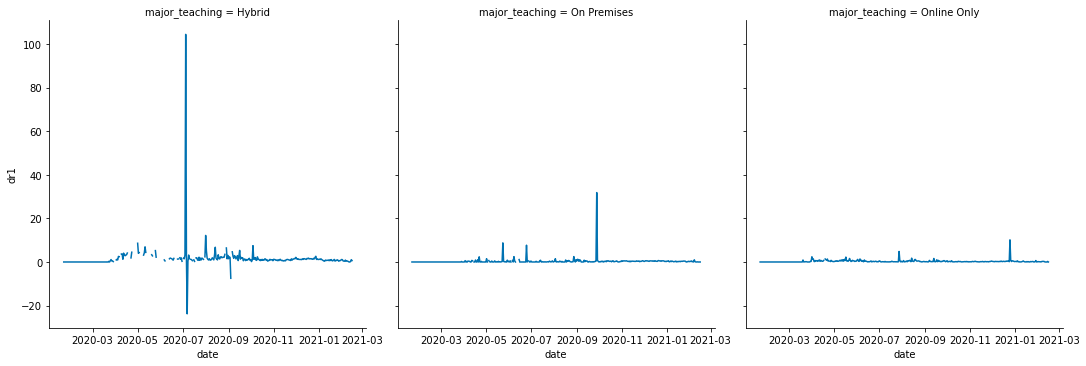

In [72]:
#data.groupby(data.index)['newdeaths'].sum().rolling(window=7).mean().plot(kind='line')
#data.groupby(data.index)['newdeaths'].sum()#.plot(kind='line')
# create the death rate variable first (lagged and unlagged)
tmp = data.groupby(['major_teaching',data.index])['dr1'].sum().unstack(0).melt(ignore_index = False, value_name = 'dr1')
sns.relplot(data = tmp, x = tmp.index, y = tmp['dr1'], kind = 'line', col = 'major_teaching')

In [79]:
data['dr2'] = data['New Deaths'].div(data['New Cases'].shift(14))
data['dr2'].replace([np.inf, -np.inf], np.nan, inplace = True)

In [81]:
data.isnull().sum()

county                         0
fips                           0
cnty_lat                       0
cnty_long                      0
population                     0
cumconfirmed                   0
cumdeaths                      0
newdeaths                      0
newconfirmed                   0
New Deaths                     0
rev_newconfirmed               0
New Cases                      0
rmed_cases                   516
ylower                      1204
yupper                      1204
population_density             0
metropolitan_status            0
nchs_urban_rural_status        0
county_enroll                  0
Hybrid                         0
On_Premises                    0
Online_Only                    0
Other                          0
Pending                        0
Unknown                        0
major_teaching                 0
death_prop                     0
death_per_1000                 0
part_work_prop_7d              0
part_work_sample_size          0
full_work_

In [85]:
data.groupby(['major_teaching_start', data.index]).sum().shape

1173

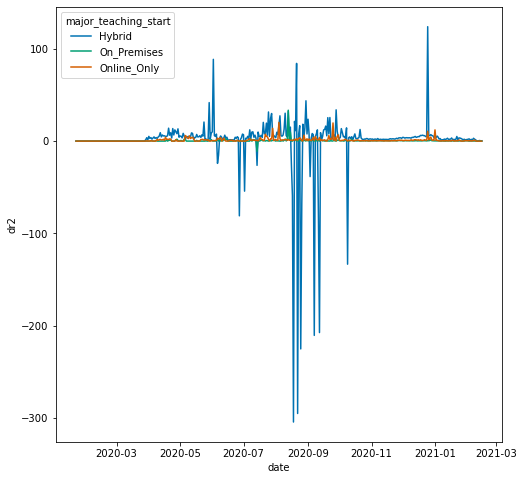

In [80]:
sns.lineplot(data = data.groupby(['major_teaching_start', data.index])['dr2'].sum().reset_index(0),
             x = data.groupby(['major_teaching_start', data.index])['dr2'].sum().reset_index(0).index,
             y = data.groupby(['major_teaching_start', data.index])['dr2'].sum().reset_index(0)['dr2'],
             hue = data.groupby(['major_teaching_start', data.index])['dr2'].sum().reset_index(0)['major_teaching_start'])
plt.show()

In [ ]:
tmp = data.groupby(['major_teaching',data.index])['dr2'].sum().unstack(0).melt(ignore_index = False, value_name = 'dr2')
sns.relplot(data = tmp, x = tmp.index, y = tmp['dr2'], kind = 'line', col = 'major_teaching')

In [ ]:
data[['newdeaths', 'newconfirmed']].corr().iloc[0,1]

In [86]:
data.columns

Index(['county', 'fips', 'cnty_lat', 'cnty_long', 'population', 'cumconfirmed',
       'cumdeaths', 'newdeaths', 'newconfirmed', 'New Deaths',
       'rev_newconfirmed', 'New Cases', 'rmed_cases', 'ylower', 'yupper',
       'population_density', 'metropolitan_status', 'nchs_urban_rural_status',
       'county_enroll', 'Hybrid', 'On_Premises', 'Online_Only', 'Other',
       'Pending', 'Unknown', 'major_teaching', 'death_prop', 'death_per_1000',
       'part_work_prop_7d', 'part_work_sample_size', 'full_work_prop_7d',
       'full_work_sample_size', 'full_work_std', 'res_visit_by_pop',
       'bar_visit_by_pop', 'major_teaching_start', 'major_teaching_end',
       'posture_change', 'dr1', 'dr2'],
      dtype='object')

In [88]:
data.population_density.nunique() == data.county.nunique()

True

In [92]:
data.population_density.nunique()

86

In [96]:
data['New Deaths'].plot(kind = 'boxplot')

ValueError: boxplot is not a valid plot kind

In [ ]:
cor_list = []
for i in range(1,22):
    tmp = data[['newdeaths', 'newconfirmed']]
    var = 'newconfirmed_lag'
    tmp[var] = data.newconfirmed.shift(i)
    tmp[var].replace([np.inf, -np.inf], np.nan, inplace = True)
    cor_list.append(tmp[['newdeaths', var]].corr().iloc[0,1])
print(cor_list.index(max(cor_list)))
plt.plot(cor_list)
plt.show()

In [ ]:
data['drmaxcorr'] = data.newdeaths.div(data.newconfirmed.shift(cor_list.index(max(cor_list))))
data['drmaxcorr'].replace([np.inf, -np.inf], np.nan, inplace = True)
tmp = data.groupby(['major_teaching',data.index])['drmaxcorr'].sum().unstack(0).melt(ignore_index = False, value_name = 'drmaxcorr')
sns.relplot(data = tmp, x = tmp.index, y = tmp['drmaxcorr'], kind = 'line', col = 'major_teaching')
plt.show()

In [ ]:
sns.relplot(data = tmp, x = tmp.index, y = tmp['drmaxcorr'], kind = 'line', hue = 'major_teaching')
plt.show()

## raw data plots

In [ ]:
df = pd.read_excel("COVID_CASES_OH_CNTY_20210223_pop.xlsx", sheet_name = "data", parse_dates = ['DATE'])
df.dtypes

In [ ]:
df = df[['COUNTY', 'DATE', 'POPULATION', 'NEWCONFIRMED', 'NEWDEATHS']]
df.set_index('DATE', inplace = True)
df.head()

In [ ]:
df.shape

In [ ]:
type(df.columns[3])

In [ ]:
cor_list = []
for i in range(1,22):
    tmp = df[['NEWDEATHS', 'NEWCONFIRMED']]
    var = df.columns[3] + '_' + str(i)
    tmp[var] = tmp.NEWCONFIRMED.shift(i)
    tmp[var].replace([np.inf, -np.inf], np.nan, inplace = True)
    cor_list.append(tmp[['NEWDEATHS', var]].corr().iloc[0,1])
print(cor_list.index(max(cor_list)))
plt.plot(cor_list)
plt.show()

In [ ]:
df['drmaxcorr'] = df.NEWDEATHS.div(df.NEWCONFIRMED.shift(cor_list.index(max(cor_list))))
df['drmaxcorr'].replace([np.inf, -np.inf], np.nan, inplace = True)
sns.relplot(data = df, x = df.index, y = df.drmaxcorr, kind = 'line', ci = None)
# tmp = df.groupby(['major_teaching',data.index])['drmaxcorr'].sum().unstack(0).melt(ignore_index = False, value_name = 'drmaxcorr')
# sns.relplot(data = tmp, x = tmp.index, y = tmp['drmaxcorr'], kind = 'line', col = 'major_teaching')
plt.show()

In [ ]:
df.groupby("COUNTY")['POPULATION'].max().sort_values(ascending=False).index.tolist()

In [ ]:
df[df.COUNTY.isin(county_mask[:9])].sort_values('POPULATION', ascending = False).head()

In [ ]:
sns.relplot(data = df[df.COUNTY.isin(county_mask[:10])].sort_values('POPULATION', ascending = False),
       x = df[df.COUNTY.isin(county_mask[:10])].sort_values('POPULATION', ascending = False).index,
       y = 'NEWDEATHS',
        kind = 'line',
       col = 'COUNTY',
       col_wrap = 3)
plt.show()

In [ ]:
sns.relplot(data = df[df.COUNTY.isin(county_mask[:10])].sort_values('POPULATION', ascending = False),
       x = df[df.COUNTY.isin(county_mask[:10])].sort_values('POPULATION', ascending = False).index,
       y = 'NEWDEATHS',
        kind = 'line',
       hue = 'COUNTY')
plt.show()

In [ ]:
sns.relplot(data = df[df.COUNTY.isin(county_mask[:9])].sort_values('POPULATION', ascending = False),
       x = df[df.COUNTY.isin(county_mask[:9])].sort_values('POPULATION', ascending = False).index,
       y = 'CUMDEATHS',
        kind = 'line',
       col = 'COUNTY',
       col_wrap = 3)
plt.show()

In [ ]:
sns.relplot(data = df[df.COUNTY.isin(county_mask[:9])].sort_values('POPULATION', ascending = False),
       x = df[df.COUNTY.isin(county_mask[:9])].sort_values('POPULATION', ascending = False).index,
       y = 'CUMDEATHS',
        kind = 'line',
       hue = 'COUNTY')
plt.show()

## other scratch work

In [ ]:
plotter_cumu = data.loc[data['COUNTY'].isin(county_mask[:9]), ['COUNTY', 'POPULATION', 'CUMCONFIRMED', 'CUMDEATHS']]\
.melt(id_vars = ['COUNTY', 'POPULATION'], ignore_index = False)